In [1]:
import re
from pandas import Series, DataFrame
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Read files
df_raw = pd.read_csv('C:\Users\Abraham\MSBA\Text\HW1\Train_rev1.csv')
df_train = df_raw.sample(2500)

# Part A1

In [3]:
df_train = df_train[['Id','FullDescription','SalaryNormalized']]
df_train['FullDescription'] = df_train['FullDescription'].map(str.lower)

In [4]:
pos_dt = {}

def pos_count(desc):
    tokens = re.findall('\w+', desc)
    tokenlist = nltk.pos_tag(tokens)
    
    for t in tokenlist:
        pos = t[1]
        if pos in pos_dt:
            pos_dt[pos] += 1
        else:
            pos_dt[pos] = 1
    
    return desc

df_train['FullDescription'].map(pos_count)

pos_dt


{'$': 24,
 "''": 2,
 'CC': 31697,
 'CD': 4702,
 'DT': 51909,
 'EX': 245,
 'FW': 392,
 'IN': 66717,
 'JJ': 72121,
 'JJR': 865,
 'JJS': 1232,
 'MD': 10503,
 'NN': 164276,
 'NNP': 237,
 'NNPS': 1,
 'NNS': 52148,
 'PDT': 100,
 'POS': 7,
 'PRP': 12927,
 'PRP$': 7859,
 'RB': 15463,
 'RBR': 304,
 'RBS': 239,
 'RP': 952,
 'TO': 20933,
 'UH': 2,
 'VB': 33296,
 'VBD': 3619,
 'VBG': 23927,
 'VBN': 12521,
 'VBP': 15570,
 'VBZ': 11089,
 'WDT': 1413,
 'WP': 1522,
 'WP$': 25,
 'WRB': 928}

In [5]:
stop_words = set(stopwords.words('english'))

pos_nostop_dt = {}

def pos_nostop_count(desc):
    tokens = re.findall('\w+', desc)
    filtered_tokens = [w for w in tokens if not w in stop_words]
    
    tokenlist = nltk.pos_tag(filtered_tokens)
    
    for t in tokenlist:
        pos = t[1]
        if pos in pos_nostop_dt:
            pos_nostop_dt[pos] += 1
        else:
            pos_nostop_dt[pos] = 1
    
    return desc

df_train['FullDescription'].map(pos_nostop_count)

pos_nostop_dt


{'$': 21,
 "''": 1,
 'CC': 501,
 'CD': 4730,
 'DT': 286,
 'FW': 511,
 'IN': 6274,
 'JJ': 74763,
 'JJR': 356,
 'JJS': 1197,
 'MD': 2528,
 'NN': 158131,
 'NNP': 290,
 'NNS': 51617,
 'POS': 6,
 'PRP': 607,
 'PRP$': 6,
 'RB': 13630,
 'RBR': 229,
 'RBS': 65,
 'RP': 95,
 'SYM': 4,
 'UH': 6,
 'VB': 7633,
 'VBD': 8539,
 'VBG': 26777,
 'VBN': 7657,
 'VBP': 17148,
 'VBZ': 4054,
 'WDT': 23,
 'WP': 26,
 'WP$': 25,
 'WRB': 34}

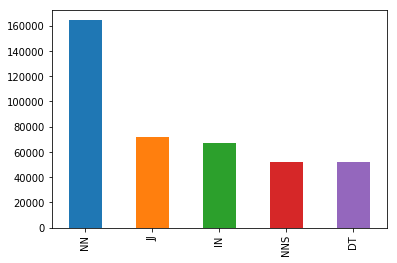

In [6]:
Series(pos_dt).sort_values(ascending=False)[0:5].plot(kind='bar')

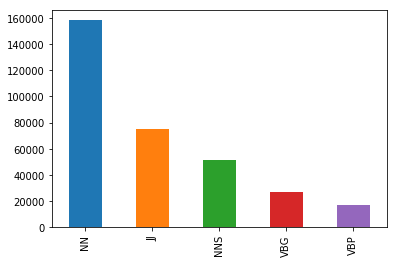

In [7]:
Series(pos_nostop_dt).sort_values(ascending=False)[0:5].plot(kind='bar')

# Part A2

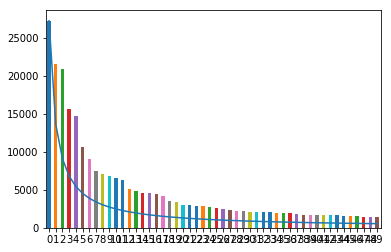

In [8]:
a = df_train['FullDescription'].str.cat(sep = ' ') #pos = a.decode('utf-8')
s = re.findall('\w+', a)
s = Series(s)

df_words = DataFrame(s.value_counts())
df_words = df_words.reset_index()
df_words.columns = ['Word','Counts']

topcount = df_words.iloc[0]['Counts']
zipf_list = []

for f in range(1,len(df_words)):
    zipf_list.append(topcount/f)

Series(zipf_list)
    
df_words['Zipf'] = Series(zipf_list)

df_words['Counts'][0:50].plot(kind='bar')
df_words['Zipf'][0:50].plot(kind='line')



In [9]:
s = re.findall('\w+', a)
s = [w for w in s if not w in stop_words]

lemmatizer = WordNetLemmatizer()
s = Series(s).map(lemmatizer.lemmatize)

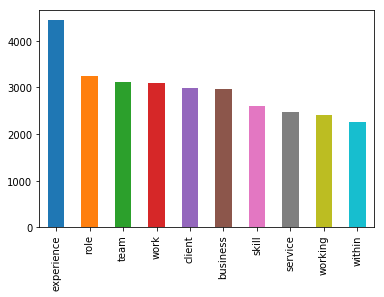

In [10]:
s.value_counts()[0:10].plot(kind='bar')

# Part B1

In [11]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [126]:
df_train = df_raw.dropna().sample(2500)
cutoff = df_train['SalaryNormalized'].quantile(0.75)

df_train['HighSalary'] = 0
df_train['HighSalary'][df_train['SalaryNormalized']>cutoff] = 1

df_train.head()

C:\Users\Abraham\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,HighSalary
2664,55410037,Non Fucntional Test Analyst,Non Fucntional Test Analyst Location: Rickmans...,Buckinghamshire,Buckinghamshire,full_time,permanent,JOBG8,IT Jobs,"Up to 60,000 per year + 50000.00-60000.00",60000,planetrecruit.com,1
202034,71882888,Senior Research Executive International Resea...,An international Research Agency is looking fo...,Greater London,London,full_time,permanent,RP CUSHING,Teaching Jobs,25000.00 - 30000.00 per annum,27500,jobs.guardian.co.uk,0
44247,68508488,Store Manager,As the leading specialist retailer in electron...,London,London,full_time,permanent,networx,Consultancy Jobs,"20,000-24,000 + Excellent Benefits",22000,fish4.co.uk,0
195110,71798047,Year 5 Teacher,Are you a Year 5 Teacher who would relish the ...,London,London,full_time,permanent,Edustaff,Teaching Jobs,"From 27,000 to 35,000 per year + MPS plus TLR",31000,jobsineducation.co.uk,0
177525,71531502,Specialist Dyslexia Teacher in the Learning Su...,Specialist Teacher in the Learning Support Dep...,Central London,Central London,full_time,permanent,ITN Mark Education West London,Teaching Jobs,25000.00 - 40000.00 GBP Annual,32500,jobs.newstatesman.com,0


In [147]:
df_nbtrain = pd.get_dummies(df_train[['ContractType','ContractTime','Category']])

#Cities where avg rent is >= 20% of avg income
high_cities = ['London', 'Central London','The City','Brighton','Edinburgh','Bristol','Southampton','Portsmouth','Exeter'\
                 ,'Cardiff', 'Manchester', 'Birmingham', 'Leeds', 'Aberdeen', 'Glasgow', 'Newcastle', 'Sheffield', 'Liverpool', 'Hull']

a = df_train['LocationNormalized']
b = []

for i in range(len(a)):
    if a.iloc[i] in high_cities: 
        b.append(1)
    else: b.append(0)

df_nbtrain['ExpensiveCity'] = b
df_nbtrain['HighSalary'] = df_train['HighSalary']
df_nbtrain = df_nbtrain.drop(columns=['ContractType_part_time','ContractTime_contract'])
df_nbtrain.head()


,ContractType_full_time,ContractTime_permanent,Category_Accounting & Finance Jobs,Category_Admin Jobs,Category_Charity & Voluntary Jobs,Category_Consultancy Jobs,Category_Creative & Design Jobs,Category_Customer Services Jobs,Category_Domestic help & Cleaning Jobs,"Category_Energy, Oil & Gas Jobs",...,Category_Property Jobs,Category_Retail Jobs,Category_Sales Jobs,Category_Scientific & QA Jobs,Category_Social work Jobs,Category_Teaching Jobs,Category_Trade & Construction Jobs,Category_Travel Jobs,ExpensiveCity,HighSalary
2664,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202034,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
44247,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
195110,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
177525,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [149]:
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from patsy import dmatrices
from sklearn import metrics

In [163]:
dummy_column_names = list(df_nbtrain.columns.values)[:-1]

formula = 'HighSalary ~ 0 + {}'.format(' + '.join(['Q("{}")'.format(x) for x in dummy_column_names]))

nbtrain, nbtest = train_test_split(df_nbtrain, test_size=0.2)
    
#Training Sets
Ytrain, xtrain = dmatrices(formula, nbtrain, return_type='dataframe')
ytrain = Ytrain['HighSalary'].values

#Testing Set
Ytest, xtest = dmatrices(formula, nbtest, return_type='dataframe')
ytest = Ytest['HighSalary'].values

model = naive_bayes.MultinomialNB()
model.fit(xtrain, ytrain)

prediction_train = model.predict(xtrain)
print "Training"
print metrics.accuracy_score(ytrain, prediction_train)

print " " 
print "Test"
prediction_test = model.predict(xtest)
print metrics.accuracy_score(ytest, prediction_test)

Training
0.76
 
Test
0.776


# Part B2 